In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname("__file__"), ".."))

# Import pacakges

In [2]:
from bertopic import BERTopic
import pandas as pd
from topicmod.config import myconfig
from topicmod.topicmodeling.bertopmod import init_topic_model, init_topics_over_time, load_model

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2022-09-30 11:59:29.764 INFO    sentence_transformers.SentenceTransformer: Load pretrained SentenceTransformer: C:\Users\BENREKIA\Documents\Stage\Workspace\1.2-bertopic-app\topicmod\config.py\..\..\bin\paraphrase-MiniLM-L12-v2
2022-09-30 11:59:30.504 INFO    sentence_transformers.SentenceTransformer: Use pytorch device: cpu


In [3]:
pd.set_option('display.max_colwidth', None)

# Loading data

In [4]:
gm_df = pd.read_csv("../data/output/scraping/agences_reviews_20220414.csv",sep = ";", encoding = "utf-8-sig")
filtre = gm_df['text'].apply(lambda x: not isinstance(x, str))
gm_df = gm_df[~filtre]

In [5]:
gm_df.sample(3)

author_name  user_rating  \
7732   Jacques Eglin            5   
3368  Anthony Rouzée            5   
4986   Sandra Dornet            1   

                                                                            text  \
7732                                                TRES BON ACCEUIL ET RAPIDITE   
3368     Merci à ma conseillère Rachida toujours disponible et avec le sourire !   
4986  Une étoile qui en vaut évidemment zéro!\nInadmissible banque injoignable 🤬   

     review_date                     place_id  \
7732  2021-10-26  ChIJDS3FHg4-kkcRwVG9EvMk__g   
3368  2021-10-20  ChIJrWfC6vlusBIRSqHn8oVNg_c   
4986  2022-03-15  ChIJ0W9aShZk5kcRgvC52Gs2CUw   

                                                address       phone_number  \
7732       24 Av. Léon Jouhaux, 70400 Héricourt, France  +33 3 84 46 00 66   
3368   182 Av. Maréchal Joffre, 66000 Perpignan, France  +33 4 30 19 91 95   
4986  72 Bis Rue Edouard Vaillant, 95870 Bezons, France   +33 820 33 62 11   

                                                                                    website  
7732                                                  https://www.bpbfc.banquepopulaire.fr/  
3368  https://www.agences.caisse-epargne.fr/banque-assurance/perpignan-joffre-id13485000328  
4986                                                                   https://www.bred.fr/

# Fitting the model

In [6]:
# check the documentation for Bertopic : https://maartengr.github.io/BERTopic/index.html

In [7]:
docs, dates, topic_model = init_topic_model(gm_df)

In [8]:
topics, probs = topic_model.fit_transform(docs)

2022-09-30 12:22:00.598 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [11]:
topic_model.get_topic_info()

Topic  Count                                            Name
0       -1   9421            -1_banque_clients_compte_conseillère
1        0   1055               0_téléphone_mails_joindre_réponse
2        1    811                  1_caisse_épargne_clients_était
3        2    750            2_directeur_client_téléphone_agences
4        3    609                 3_conseillers_banque_mois_faire
..     ...    ...                                             ...
174    173     11               173_incapables_bande_rois_équipes
175    174     10         174_charge_forte_réclamer_stationnement
176    175     10                    175_bof_proches_hydro_myriam
177    176     10  176_déconseillent_prescrits_désirons_contextes
178    177     10        177_automatique_guichet_inactif_sécurisé

[179 rows x 3 columns]

In [12]:
topic_model.get_topic(8)

[('chèque', 0.06445239032844761),
 ('déposé', 0.01851615236527605),
 ('dépôt', 0.01416469258225957),
 ('encaissé', 0.010996778339133036),
 ('perdu', 0.010426303344007721),
 ('boîte', 0.0066336718494591565),
 ('fermée', 0.0064423449228167545),
 ('remplir', 0.006381399860141882),
 ('crédité', 0.00604822808652317),
 ('inadmissible', 0.005648333112726166)]

In [29]:
topic_model.get_topic(19)

[('clôture', 0.02606789397270575),
 ('comptes', 0.015825248407253786),
 ('frais', 0.011249851766071343),
 ('demande', 0.010284895781358492),
 ('transfert', 0.009955562279520607),
 ('euros', 0.008342567487162132),
 ('2020', 0.006653741862433739),
 ('courriers', 0.006504407025735218),
 ('gestion', 0.006170684016103938),
 ('ouvrir', 0.005589438335900431)]

In [32]:
topic_model.get_topic_freq(8) # nbr of documents

349

In [34]:
topic_model.get_representative_docs(8) #documents representatifs du topic

['Dépose d une remise de chèque le vendredi . Chèque visible sur le compte le mardi soir c est inadmissible et ça fait deux fois !',
 "très mauvaise agence,\nJ' ai déposé un chèque très important il y a plus de 3 mois et il n'a toujours pas été porté à mon compte, parcontre il a bien été débité.\nJe trouve cela inadmissible, de plus on ne m'a jamais prévenu de quoi que ce soit.\nCela s'apparente très fortement à de l'escroquerie.",
 'Petite banque mais, personnel sympathique il mont aide à remplir un dépôt de chèque car je suis illettré.']

In [38]:
# setting labels to topics
topic_model.set_topic_labels({8: "Gestion des chéques"})
topic_model.custom_labels_[9] #0: correspand au cluster des outleirs

'Gestion des chéques'

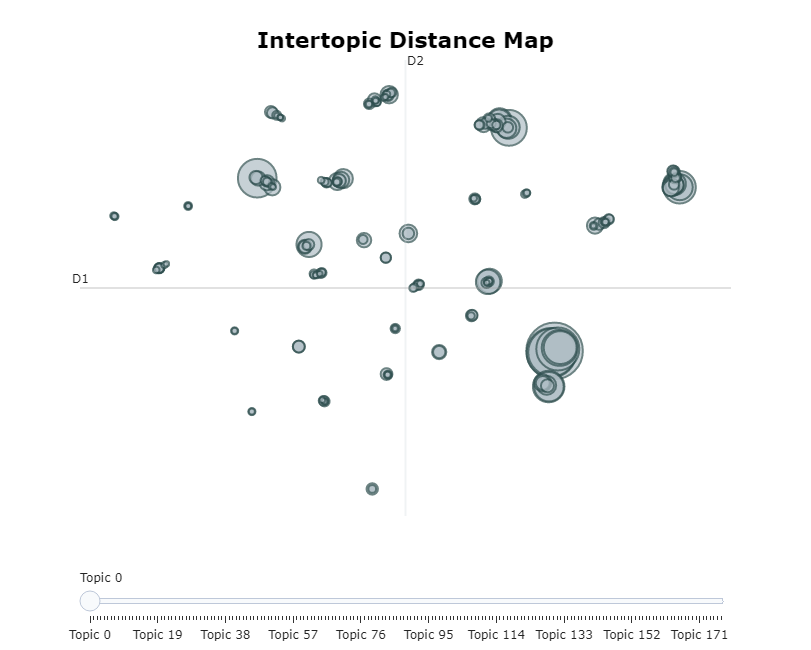

In [30]:
topic_model.visualize_topics()

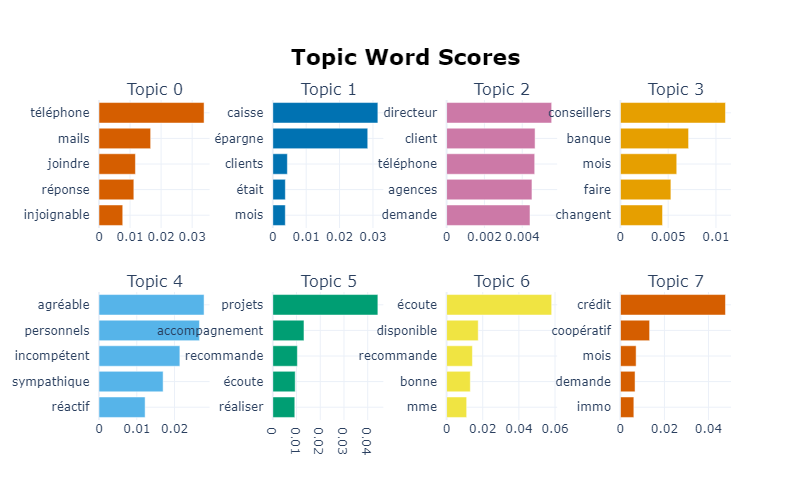

In [40]:
topic_model.visualize_barchart()

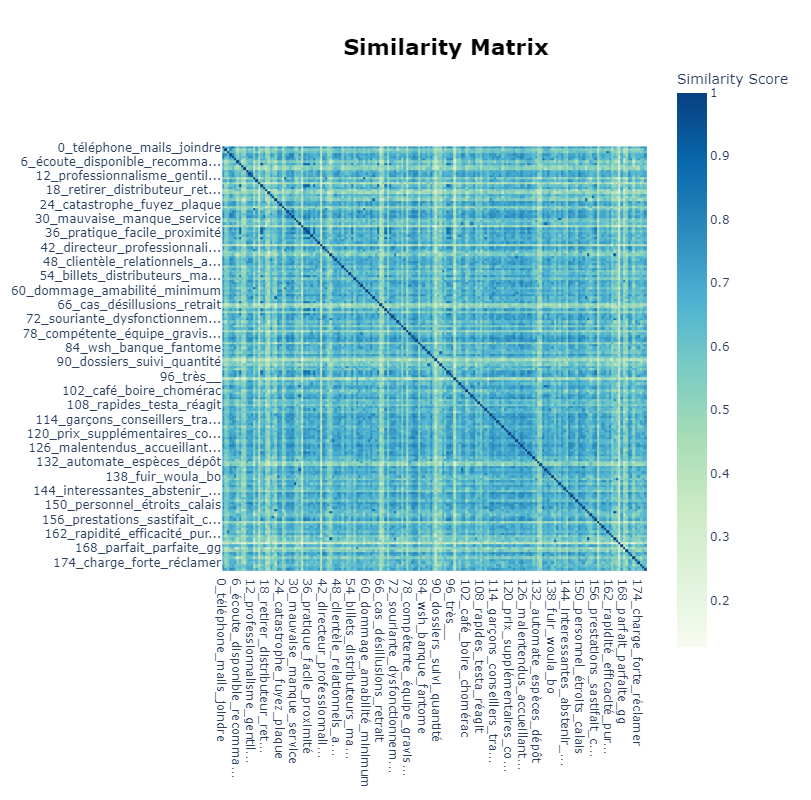

In [42]:
topic_model.visualize_heatmap()

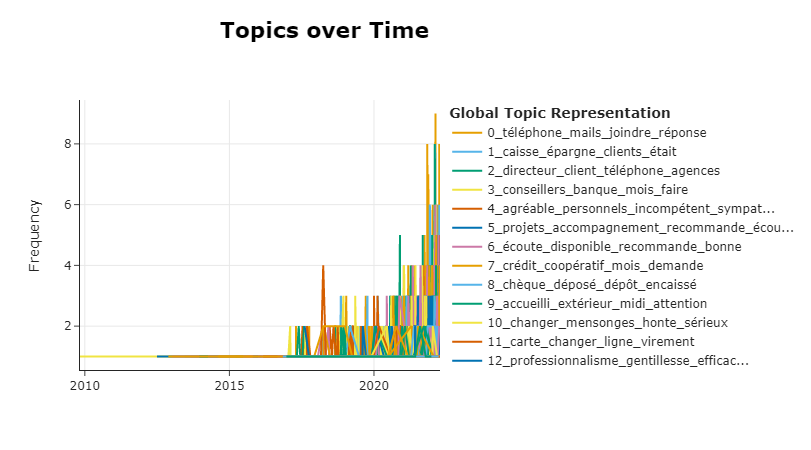

In [44]:
topics_over_time = topic_model.topics_over_time(docs, dates)
topic_model.visualize_topics_over_time(topics_over_time)

# Saving outputs

In [45]:
pd.DataFrame({'topic': topics, 'document': docs})

topic  \
0         24   
1        176   
2         -1   
3         -1   
4         -1   
...      ...   
22510      7   
22511     10   
22512     -1   
22513     25   
22514      6   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              document  
0                                                                                                                                                                    Mon conseiller de Colombes  (je ne me souviens plus du nom mais son prénom est composé jean marc) à pris le relais de la catastrophe précédente et a su régler tout mes problèmes et a fait preuve de professionnalisme et de patience surtout à mon égard.   Si je devais donné plus que 5 étoiles à ce monsieur je l'aurais fait  ! Mille merci  
1                                                                                                                                                                                                                                                            Un manque de professionnalisme flagrant !!\nPersonnel hautain et condescendant au téléphone.\nElle ne répond pas à mes demandes, et me répondait comme ci ce que je demandais était logique pour tout le monde, je vous déconseille cette banque. A fuir.  
2                                                                                                                                                                                                                                                           Mme Labed est une super directrice à l'écoute. Elle a su prendre en compte mes demandes tout en prenant en compte mes inquiétudes.\nSes conseils sont utiles et son accompagnement est au top !\nMerci à elle pour sa réactivité et son professionnalisme.  
3      0 professionnalisme ! Une banque à fuir. Dommage que je soit obligé de mettre une étoile car une étoile est au dessus de leurs compétences.\nChangement de carte sans demande de consentement, conseillé qui changent tout le temps, conseillés inexistants, personnes chargé de l’appel incompétentes. En plus de ça Manque de respect, banque en retard sur leurs concurrent d’ailleurs.\nMême les banques en ligne sont plus compétentes.\nJe vais littéralement changé de banque !\nUn conseil ? FUYEZ !!!!  
4                                                         Si j’avais pu mettre 0 je l’aurais fait. Une agence dont l’équipe se fiche complètement de ses clients. Un service des plus désagréable, traitement des dossiers long, aucune amabilité. Ils vous disent qu’ils vont vous rappeler et ne rappelle jamais! Je suis tombé UNE FOIS sur M. Jean-Marc Mbonjo qui lui était au moins une l’écoute et disposé à m’apporter la meilleure solution, mais malheureusement le reste de l’équipe ne suit pas! A éviter!  
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ...  
22510                                                                                                                                                                                                                                                                                  

In [46]:
topic_model.save("../models/bertopic_test2")

C:\Users\BENREKIA\AppData\Local\miniforge3\envs\env_2\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [47]:
t_model = BERTopic.load("../models/bertopic_test2")

# Model Parameters manipulation

please refer to : 

tips and tricks :https://maartengr.github.io/BERTopic/getting_started/tips_and_tricks/tips_and_tricks.html

FAQ: https://maartengr.github.io/BERTopic/faq.html

In [ ]:
# predict new documents
new_docs = ["je n'arrive pas à clôturer mon compte bancaire"]
topics, probs = topic_model.transform(new_docs)
topics

In [ ]:
# reducing outliers : lower min_samples value (default= min_cluster_size)
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', 
                        cluster_selection_method='eom', prediction_data=True, min_samples=5)
topic_model = BERTopic(hdbscan_model=hdbscan_model)
topics, probs = topic_model.fit_transform(docs)

In [ ]:
# reduce nbr of topics 
topic_model = BERTopic(nr_topic="auto")
topics, probs = topic_model.fit_transform(docs)

In [ ]:
# calculate all probabilities of all topics for each document
topic_model = BERTopic(calculate_probabilities=True)
topics, probs = topic_model.fit_transform(docs) 